# CNN Frogs Classification

## Prepare


In [175]:
# python3 -m venv .venv
# source .venv/bin/activate
# pip install -r req.txt

# deactivate

!pip list

Package                   Version
------------------------- -----------
absl-py                   2.4.0
anyio                     4.12.1
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.1
astunparse                1.6.3
async-lru                 2.2.0
attrs                     25.4.0
babel                     2.18.0
beautifulsoup4            4.14.3
bleach                    6.3.0
certifi                   2026.2.25
cffi                      2.0.0
charset-normalizer        3.4.4
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.20
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fastjsonschema            2.21.2
flatbuffers               25.12.19
fonttools                 4.61.1
fqdn                      1.5.1
gast                      0.7.0
google-pasta              0.2.0
grpcio         

In [176]:
import tensorflow as tf
import os

In [177]:
gpus = tf.config.list_physical_devices('GPU')
len(gpus)

0

In [178]:
os.listdir('dataset')

['1', '3', '5', '4', '2']

## Activation funcitons

| $relu(x)$   | $softplus(x)$ | $\sigma(x)$          |
|:------------|:--------------|:---------------------|
| $\max(0,x)$ | $\ln(1+e^x)$  | $\frac{1}{1+e^{-x}}$ |

In [179]:
import numpy           as np
import pandas           as pd
import seaborn           as sns
import matplotlib.pyplot  as plt 

plt.style.use("dark_background")

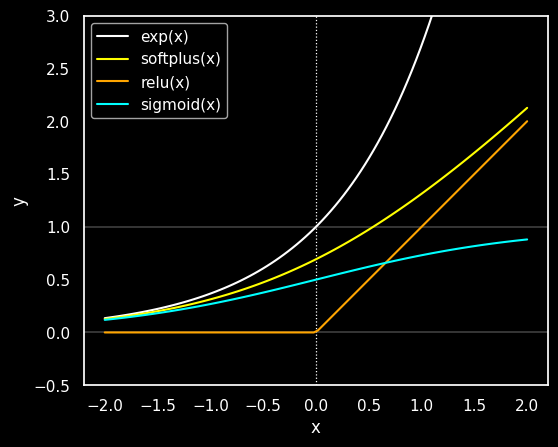

In [222]:
x          = np.linspace(-2, 2, 100)
exp_x      = np.exp(x)
relu_x     = np.maximum(0, x)
softplus_x = np.log(1 + exp_x)
sigm_x     = np.divide(exp_x, (1 + exp_x))

sigm_data = pd.DataFrame({
    "x": np.tile(x, 4),
    "y": np.concatenate([exp_x, softplus_x, relu_x, sigm_x]),
    "h": ["exp(x)"]*len(x) + ["softplus(x)"]*len(x) + ["relu(x)"]*len(x) + ["sigmoid(x)"]*len(x)
})

plt.gca().set_aspect("equal", adjustable='box')
plt.ylim(bottom=-0.5, top=3)

plt.axvline(x=0, linestyle=":", color="white", linewidth=0.9)
plt.axhline(y=0, linestyle="-", color="white", linewidth=0.3)
plt.axhline(y=1, linestyle="-", color="white", linewidth=0.3)

sns.lineplot(data=sigm_data, x="x", y="y", hue="h", palette=["white", "yellow", "orange", "cyan"])

plt.legend(title=None)
plt.show()

$\sigma_i(\mathbf{z}) = \frac{e^{z_i}}{\sum_{j=1}^N\ e^{z_j}}$

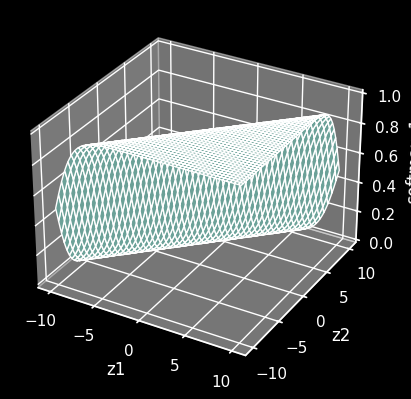

In [227]:
from mpl_toolkits.mplot3d import Axes3D

z1 = np.linspace(-10, 10, 200)
z2 = np.linspace(-10, 10, 200)
Z1, Z2 = np.meshgrid(z1, z2)

exp1 = np.exp(Z1)
exp2 = np.exp(Z2)

P1 = exp1 / (exp1 + exp2)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.plot_surface(Z1, Z2, P1)

ax.set_xlabel("z1")
ax.set_ylabel("z2")
ax.set_zlabel("softmax_1")

plt.show()

## Get images

In [223]:
# ...